# Chapter 1 Exercise 5

files : 

1. [Exchange rates of Canadian Dollar: d-cacus.txt](https://faculty.chicagobooth.edu/-/media/faculty/ruey-s-tsay/teaching/fts3/d-caus.txt)

2. [United Kingdom Pound: d-usuk.txt](https://faculty.chicagobooth.edu/-/media/faculty/ruey-s-tsay/teaching/fts3/d-usuk.txt)

3. [Japanese Yen: d-jpus.txt](https://faculty.chicagobooth.edu/-/media/faculty/ruey-s-tsay/teaching/fts3/d-jpus.txt)

4. [Euro: d-useu.txt](https://faculty.chicagobooth.edu/-/media/faculty/ruey-s-tsay/teaching/fts3/d-useu.txt)

Page 27 Exercise 5

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, norm

# Load data here
canada = pd.read_csv('./data/d-caus.txt', delim_whitespace=True, index_col= ['year','mon','day'])
canada

rate
year mon day        
2000 1   4    1.4518
         5    1.4518
         6    1.4571
         7    1.4505
         10   1.4568
...              ...
2009 3   23   1.2322
         24   1.2263
         25   1.2245
         26   1.2327
         27   1.2392

[2323 rows x 1 columns]

In [11]:
# Load data here
uk = pd.read_csv('./data/d-usuk.txt', delim_whitespace=True, index_col= ['date','mon','day'])
uk

value
date mon day        
2000 1   4    1.6370
         5    1.6415
         6    1.6475
         7    1.6384
         10   1.6374
...              ...
2009 3   23   1.4496
         24   1.4730
         25   1.4585
         26   1.4497
         27   1.4325

[2323 rows x 1 columns]

In [3]:
# Load data here
japan = pd.read_csv('./data/d-jpus.txt', delim_whitespace=True, index_col= ['year','mon','day'])
japan

value
year mon day        
2000 1   4    103.09
         5    103.77
         6    105.19
         7    105.17
         10   105.28
...              ...
2009 3   23    97.30
         24    97.86
         25    97.70
         26    98.47
         27    97.99

[2323 rows x 1 columns]

In [4]:
# Load data here
euro = pd.read_csv('./data/d-useu.txt', delim_whitespace=True, index_col= ['Date','Mon','Day'])
euro

Value
Date Mon Day        
2000 1   4    1.0309
         5    1.0335
         6    1.0324
         7    1.0294
         10   1.0252
...              ...
2009 3   23   1.3569
         24   1.3524
         25   1.3539
         26   1.3560
         27   1.3306

[2323 rows x 1 columns]

In [16]:
def analyze_currency(data, column_name):
    data['log_return'] = np.log(data[column_name] / data[column_name].shift(1))
    data = data.dropna()
    
    # Descriptive statistics
    mean = data['log_return'].mean()
    std_dev = data['log_return'].std()
    skewness = skew(data['log_return'])
    excess_kurtosis = kurtosis(data['log_return'])  # Excess kurtosis
    min_return = data['log_return'].min()
    max_return = data['log_return'].max()

    return data['log_return'], mean, std_dev, skewness, excess_kurtosis, min_return, max_return

In [18]:
log_return_canada, mean_canada, std_dev_canada, skewness_canada, kurtosis_canada, min_canada, max_canada = analyze_currency(canada, 'rate')

In [19]:
print(log_return_canada, "\n", "Mean :", mean_canada, "\n", std_dev_canada, "\n", skewness_canada, "\n", kurtosis_canada, "\n", min_canada, "\n", max_canada)

year  mon  day
2000  1    5      0.000000
           6      0.003644
           7     -0.004540
           10     0.004334
           11     0.000137
                    ...   
2009  3    23    -0.003888
           24    -0.004800
           25    -0.001469
           26     0.006674
           27     0.005259
Name: log_return, Length: 2322, dtype: float64 
 Mean : -6.81904202188098e-05 
 0.00587647630302097 
 -0.23903893850033844 
 8.25502612715371 
 -0.05071598584889788 
 0.03806962493683204


In [20]:
log_return_uk, mean_uk, std_dev_uk, skewness_uk, kurtosis_uk, min_uk, max_uk = analyze_currency(uk, 'value')

In [21]:
log_return_japan, mean_japan, std_dev_japan, skewness_japan, kurtosis_japan, min_japan, max_japan = analyze_currency(japan, 'value')

In [22]:
log_return_euro, mean_euro, std_dev_euro, skewness_euro, kurtosis_euro, min_euro, max_euro = analyze_currency(euro, 'Value')

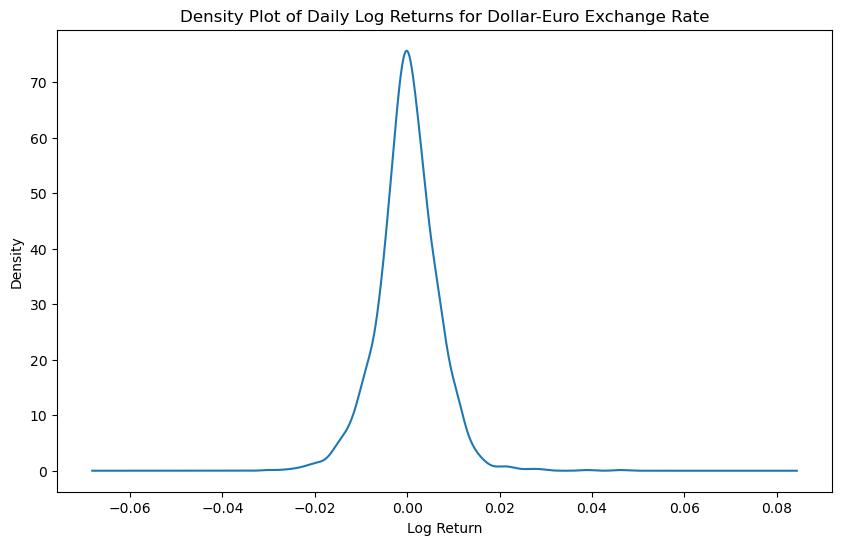

In [23]:
# Density plot for Euro
plt.figure(figsize=(10, 6))
log_return_euro.plot(kind='density')
plt.title('Density Plot of Daily Log Returns for Dollar-Euro Exchange Rate')
plt.xlabel('Log Return')
plt.show()

### Appendix 1. with normal return

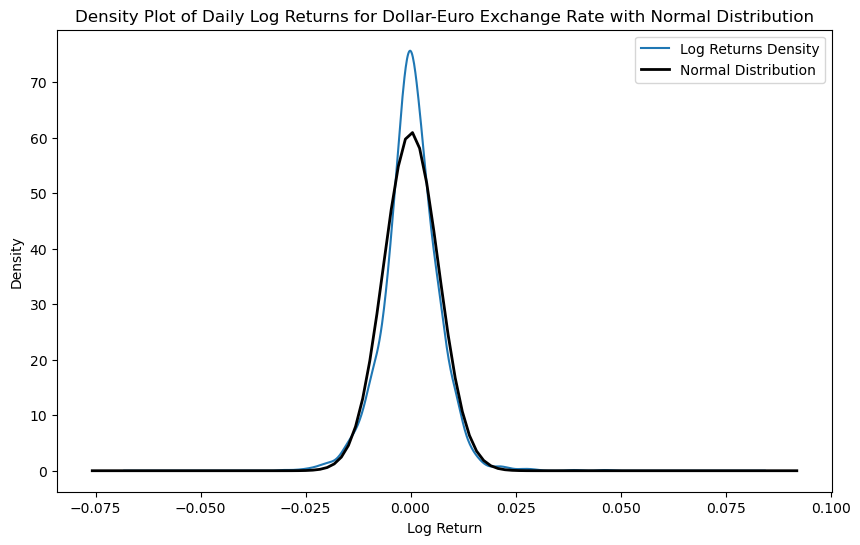

In [25]:
# Density plot for Euro with comparison to normal distribution
plt.figure(figsize=(10, 6))

# Plotting the density of log returns
log_return_euro.plot(kind='density', label='Log Returns Density')

# Mean and standard deviation for the log returns
mean_euro, std_dev_euro = log_return_euro.mean(), log_return_euro.std()

# Generating data for the normal distribution with the same mean and standard deviation
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean_euro, std_dev_euro)

# Plotting the normal distribution
plt.plot(x, p, 'k', linewidth=2, label='Normal Distribution')

title = 'Density Plot of Daily Log Returns for Dollar-Euro Exchange Rate with Normal Distribution'
plt.title(title)
plt.xlabel('Log Return')
plt.legend()
plt.show()